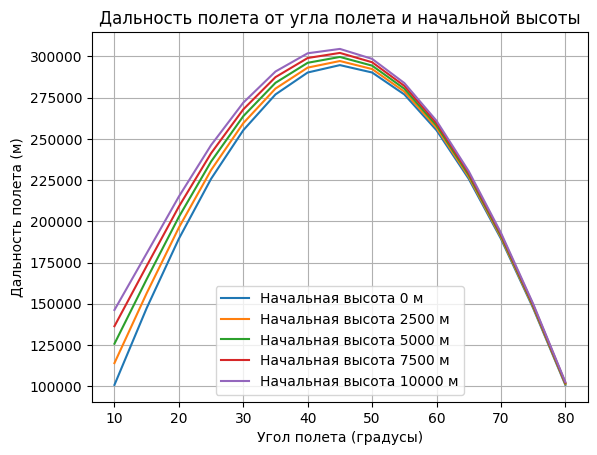

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def flight_range(V0, g, angle, h_start):
    """
    V0: начальная скорость ракеты
    g: ускорение свободного падения
    angle: угол полета (в градусах)
    h_start: начальная высота
    return: дальность полета
    """
    angle_rad = np.radians(angle)
    term1 = V0 * np.cos(angle_rad) / g
    term2 = V0 * np.sin(angle_rad) / g + np.sqrt((V0 * np.sin(angle_rad))**2 + 2 * g * h_start)
    return term1 * term2

def analyze_flight_ranges(V_g, m_p, m_n, m_t, angles, h_start_values, g=9.81):
    """
    V_g: скорость истекания газов
    m_p: масса полезной нагрузки
    m_n: масса несгоревшей конструкции
    m_t: общая масса топлива
    angles: список углов полета (в градусах)
    h_start_values: список начальных высот
    g: ускорение свободного падения
    """
    for h_start in h_start_values:
        distances = []
        for angle in angles:
            V0 = V_g * np.log((m_p + m_n + m_t) / (m_p + m_n))
            distance = flight_range(V0, g, angle, h_start)
            distances.append(distance)

        plt.plot(angles, distances, label=f"Начальная высота {h_start:.0f} м")

    plt.xlabel("Угол полета (градусы)")
    plt.ylabel("Дальность полета (м)")
    plt.title("Дальность полета от угла полета и начальной высоты")
    plt.legend()
    plt.grid(True)
    plt.show()



V_g = 2500 
m_p = 500
m_n = 1500
m_t = 3000
angles = np.linspace(10, 80, 15)
h_start_values = np.linspace(0, 10000, 5) 

analyze_flight_ranges(V_g, m_p, m_n, m_t, angles, h_start_values)


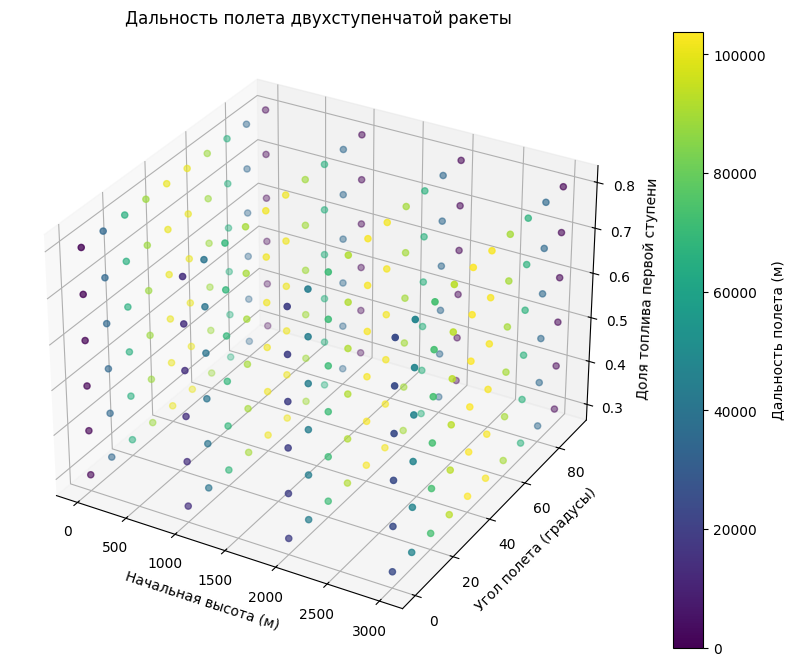

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rocket_range(initial_height, launch_angle, fuel_ratio1):
    g = 9.81 
    v0 = 1000  
    
    launch_angle_rad = np.radians(launch_angle)
    
   
    v0_x = v0 * np.cos(launch_angle_rad)
    v0_y = v0 * np.sin(launch_angle_rad)
    
   
    time_of_flight = (v0_y + np.sqrt(v0_y**2 + 2 * g * initial_height)) / g
    
    
    range_distance = v0_x * time_of_flight
    
    return range_distance


initial_heights = [0, 1000, 2000, 3000] 
launch_angles = np.arange(0, 91, 10)  


fuel_ratios1 = np.arange(0.3, 0.81, 0.1) 


results = {}

for initial_height in initial_heights:
    for launch_angle in launch_angles:
        for fuel_ratio1 in fuel_ratios1:
            fuel_ratio2 = 1 - fuel_ratio1  
            range_distance = rocket_range(initial_height, launch_angle, fuel_ratio1)
            results[(initial_height, launch_angle, fuel_ratio1, fuel_ratio2)] = range_distance


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X = []
Y = []
Z = []
C = []

for (height, angle, fuel1, fuel2), distance in results.items():
    X.append(height)
    Y.append(angle)
    Z.append(fuel1) 
    C.append(distance)


sc = ax.scatter(X, Y, Z, c=C, cmap='viridis', marker='o')
ax.set_xlabel('Начальная высота (м)')
ax.set_ylabel('Угол полета (градусы)')
ax.set_zlabel('Доля топлива первой ступени')
ax.set_title('Дальность полета двухступенчатой ракеты')
plt.colorbar(sc, label='Дальность полета (м)')
plt.show()
